In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X_train_path = 'c:/satellite/X_train.csv'
Y_train_path = 'c:/satellite/Y_train.csv'
X_train_df = pd.read_csv(X_train_path, header=None)
Y_train_df = pd.read_csv(Y_train_path, header=None)
X_train = X_train_df.values / 255
Y_train = Y_train_df.values
print(X_train.shape)
n_images = X_train.shape[0]
shape = [n_images, 28, 28, 4]
X_train_img = X_train.reshape(shape)
print(X_train_img.shape)

(2000, 3136)
(2000, 28, 28, 4)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.15)
# X_train.shape

In [28]:
y_train.shape

(1700, 4)

In [29]:
def to_class_str(labels, idx):
    if labels[idx, 0] == 1:
        return 'Barren Land'
    elif labels[idx, 1] == 1:
        return 'Trees'
    elif labels[idx, 2] == 1:
        return 'GrassLand'
    else:
        return 'Other'

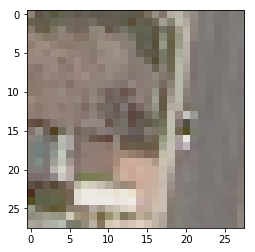

Class: Other


In [30]:
ix = np.random.randint(0, n_images)
plt.imshow(np.squeeze(X_train_img[ix, :, :, 0:3]))
plt.show()
print('Class: ' + to_class_str(Y_train, ix))

In [31]:
import tensorflow as tf

In [32]:
X = tf.placeholder(tf.float32, [None, 28, 28, 4])
Y = tf.placeholder(tf.float32, [None, 4])

In [33]:
W1 = tf.Variable(tf.random_normal([3,3,4,32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1=tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [34]:
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [35]:
W3 = tf.Variable(tf.random_normal([7*7*64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7*7*64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)

In [36]:
W4 = tf.Variable(tf.random_normal([256,4], stddev=0.01))
model = tf.matmul(L3, W4)

In [37]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [38]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [39]:
batch_size=100
total_batch = int(len(X_train) / batch_size)
total_batch

17

In [40]:
train_x = tf.convert_to_tensor(X_train)
train_y = tf.convert_to_tensor(Y_train)

In [41]:
for epoch in range(10):
    total_cost=0
    
    for i in range(total_batch):
        batch_xs = X_train[i*100:(i+1)*100, ]
        batch_ys = Y_train[i*100:(i+1)*100, ]
        batch_xs = batch_xs.reshape(-1,28,28,4)
        _, curr_loss = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys})
        total_cost += curr_loss
#         print("i ", i , "cost_value :", curr_loss)
    print("Epoch", "%04d" % (epoch +1), "Avg. cost = ", "{:,.3f}".format(total_cost/total_batch))

Epoch 0001 Avg. cost =  1.405
Epoch 0002 Avg. cost =  1.386
Epoch 0003 Avg. cost =  1.386
Epoch 0004 Avg. cost =  1.386
Epoch 0005 Avg. cost =  1.386
Epoch 0006 Avg. cost =  1.386
Epoch 0007 Avg. cost =  1.386
Epoch 0008 Avg. cost =  1.386
Epoch 0009 Avg. cost =  1.386
Epoch 0010 Avg. cost =  1.386


In [42]:
correctness = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correctness, tf.float32))
print('Accuracy', sess.run(accuracy, feed_dict = {X:X_test.reshape(-1,28,28,4), Y:y_test}))

Accuracy 0.13666667
